
---------Testing smpling_quantizing----------

You're now testing the function:



<Figure size 432x288 with 0 Axes>

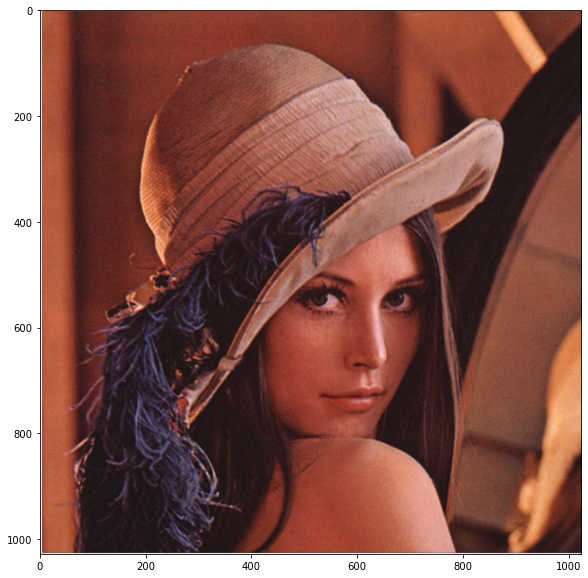


---------Testing sampling----------

Using Sampling function,sampling image pixels in even positions



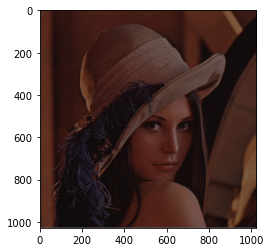


---------Testing down_sampling----------

Down sampling with factor of 2



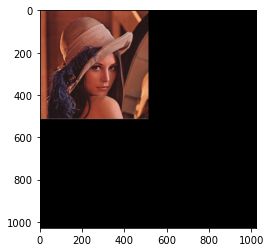


---------Testing up_sampling----------

Up sampling the factor 2 down_sampled image to the original size



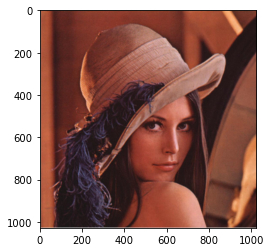


---------Testing quantization----------

Quantizing image from 256 levels to 8 levels


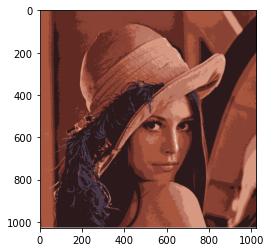

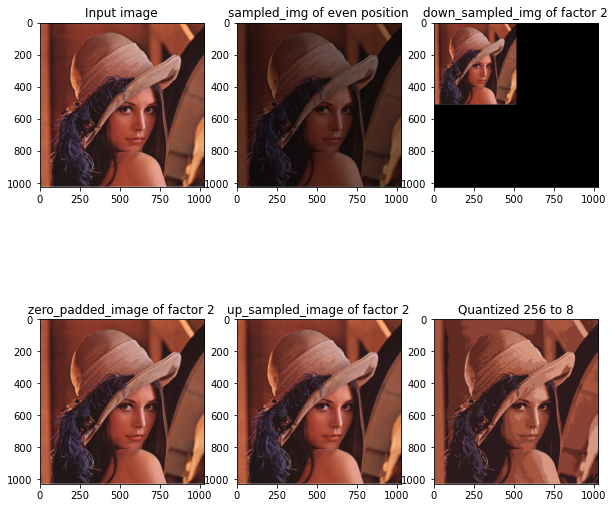

In [1]:
from skimage import io
from matplotlib import pyplot as plt
import cv2
import numpy as np

class smpling_quantizing(object):
    def __init__(self):
        print("\n---------Testing smpling_quantizing----------\n")
        print("You're now testing the function:\n")

    def sampling(self, img):
        print("\n---------Testing sampling----------\n")
        print("Using Sampling function,sampling image pixels in even positions\n")
        sampled_img = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(j % 2 == 0):
                    sampled_img[i, j] = img[i, j]
                else:
                    sampled_img[i, j] = np.zeros_like(img[0, 0])

        return sampled_img

    def down_sampling(self, img, down_sample_factor):
        print("\n---------Testing down_sampling----------\n")
        print(f"Down sampling with factor of {down_sample_factor}\n")
        down_sampled_img = np.zeros_like(img)
        img_iterator_i = 0
        for i in range(img.shape[0]):
            img_iterator_j = 0
            if(i % down_sample_factor == 0):
                for j in range(img.shape[1]):
                    if(j % down_sample_factor == 0):
                        down_sampled_img[img_iterator_i,
                                         img_iterator_j] = img[i, j]
                        img_iterator_j += 1

                img_iterator_i += 1

        return down_sampled_img

    def up_sampling(self, down_sampled_img, up_sample_factor):
        print("\n---------Testing up_sampling----------\n")
        print(f"Up sampling the factor {up_sample_factor} down_sampled image to the original size\n")
        up_sampled_image = np.zeros_like(down_sampled_img)

        # Use average interpolation to reconstruct the image
        # First Zero padding the image
        down_sampled_col = int(up_sampled_image.shape[1]/up_sample_factor)
        down_sampled_row = int(up_sampled_image.shape[0]/up_sample_factor)
        for i in range(down_sampled_row):
            for j in range(down_sampled_col):
                up_sampled_image[i*up_sample_factor, j *
                                 up_sample_factor] = down_sampled_img[i, j]

        zero_padded_image = up_sampled_image
        #print(f"The zero-padded image is of {zero_padded_image}\n")
        #print(f"Size of zero-padded image is {up_sampled_image.shape}")

        # Nearest Neighbor interpolation
        for i in range(0,up_sampled_image.shape[0],up_sample_factor):
            for j in range(0,up_sampled_image.shape[1],up_sample_factor):
                for k in range(up_sample_factor):
                    for l in range(up_sample_factor):
                        up_sampled_image[i+l,j+k] = up_sampled_image[i,j]

        recovered_image = up_sampled_image
        #print(f"The image after complete interopolation is of {up_sampled_image}\n")
        recovered_image = cv2.GaussianBlur(recovered_image,(5,5),0)

        return recovered_image,zero_padded_image

    def quantization(self, img, n_colors):
        """Process of mapping a large set of input values to output values in a smaller set"""
        """Quantization is irreversible and non-linear used to compress images s.t. it does not consume too many space
        to store data."""
        print("\n---------Testing quantization----------\n")
        print(f"Quantizing image from 256 levels to {n_colors} levels")
        # Conversion of image to BGR
        converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        # -1 flattens out the array entry, with each entry having 3 elements
        img_reshaped = converted_img.reshape((-1, 3))

        # To use Kmeans converts the data type to float32 first
        img_reshaped = np.float32(img_reshaped)

        # Sets the criteria for KMeans
        # The criteria for Kmeans
        criteria = (cv2.TERM_CRITERIA_EPS +
                    cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

        #Compactness, label and center
        ret, label, center = cv2.kmeans(
            img_reshaped, n_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # To enable image display, must convert it back to uint8
        center = np.uint8(center)

        # Flatten out the label
        rescale_img = center[label.flatten()]

        # Look at the shape of original image then reshape the processed image into the same shape
        quantized_img = rescale_img.reshape((img.shape))

        # Converting back to RGB format
        quantized_img = cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB)

        return quantized_img


"""testing function"""
def main():

    down_sampled_factor = 2
    up_sampled_factor = down_sampled_factor
    segmentation_level = 8

    # Reading the image in
    path = "C:/Users/HIBIKI/Desktop/Lab612_training/Week1/images/testing_image2.jpg"
    img = io.imread(path)

    test = smpling_quantizing()

    # print(img)
    plt.figure(1)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()


    plt.figure(2)
    sampled_img = test.sampling(img)
    plt.imshow(sampled_img)
    plt.show()

    plt.figure(3)
    down_sampled_img = test.down_sampling(img, down_sampled_factor)
    plt.imshow(down_sampled_img)
    plt.show()


    plt.figure(4)
    up_sampled_image,zero_padded_image = test.up_sampling(down_sampled_img, up_sampled_factor)
    plt.imshow(up_sampled_image)
    plt.show()


    #%%
    quantized_img = test.quantization(img,segmentation_level)
    plt.imshow(quantized_img)
    plt.show()
    #%%

    #%%Plotting all onto a single figure
    fig = plt.figure(figsize=(10, 10))

    ax1 = fig.add_subplot(231)
    ax1.imshow(img)
    ax1.title.set_text('Input image')

    ax2 = fig.add_subplot(232)
    ax2.imshow(sampled_img)
    ax2.title.set_text('sampled_img of even position')

    ax3 = fig.add_subplot(233)
    ax3.imshow(down_sampled_img)
    ax3.title.set_text(f'down_sampled_img of factor {down_sampled_factor}')

    ax4 = fig.add_subplot(234)
    ax4.imshow(zero_padded_image)
    ax4.title.set_text(f'zero_padded_image of factor {up_sampled_factor}')

    ax5 = fig.add_subplot(235)
    ax5.imshow(up_sampled_image)
    ax5.title.set_text(f'up_sampled_image of factor {up_sampled_factor}')

    ax6 = fig.add_subplot(236)
    ax6.imshow(quantized_img)
    ax6.title.set_text(f'Quantized 256 to {segmentation_level}')

    plt.show()


if __name__ == "__main__":
    main()